# Cats vs dogs kaggle challenge

In [1]:
# preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras import preprocessing

# categorical
from tensorflow.keras.utils import to_categorical

# model
from tensorflow.keras.models import Sequential

# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, BatchNormalization, Dropout

# callbacks
from tensorflow.keras.callbacks import EarlyStopping

# backend
from tensorflow.keras import backend as K

# other
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

### Reading in data

In [2]:
def prep_data(path, img_dim, total_pics=1_000):
    X = []
    y = []
    count = 0
    
    for p in os.listdir(path):
        count += 1
        category = p.split(".")[0]
        img = image.load_img(path+p, target_size=(img_dim, img_dim))
        img_array = image.img_to_array(img)
        img_array = img_array.astype(np.uint8)
        X.append(img_array)
        if category == 'dog':
            y.append(1)
        else:
            y.append(0)
        if count >= total_pics:
            break
    X_array = np.array(X)
    y_array = np.array(y)
    return X_array, y_array

In [5]:
img_dim = 61
path = "data/train/"
X, y = prep_data(path, img_dim, total_pics=10_000)

In [6]:
X.shape, y.shape

((10000, 61, 61, 3), (10000,))

0

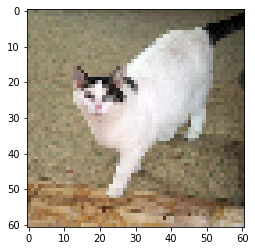

In [7]:
check = 33
plt.imshow(X[check])
y[check]

In [8]:
sum(y)

5000

### Preprocessing

In [9]:
# reshape data
y = y.reshape(y.shape + (1,))

In [10]:
# normalize the data
X = X/255 

In [11]:
X.shape, y.shape

((10000, 61, 61, 3), (10000, 1))

In [12]:
X.dtype

dtype('float64')

In [13]:
X.max(), X.min()

(1.0, 0.0)

### Train-test split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8000, 61, 61, 3), (2000, 61, 61, 3), (8000, 1), (2000, 1))

### Define plotting functions

In [15]:
# summarize history for accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [16]:
# summarize history for loss
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Build the model

In [17]:
K.clear_session()

In [18]:
# define the model
model = Sequential([
    # First convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
           input_shape=(img_dim, img_dim, 3)),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.2), 
    Activation('relu'),
    
    # Second convolutional layer
    Conv2D(filters=64, kernel_size=(3, 3), padding='same'),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.2), 
    Activation('relu'), 
    
    # Flattening 
    Flatten(),
    
    # Output layer
    Dense(1), Activation('sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 61, 61, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0

In [20]:
# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

### Fit the model

In [21]:
# fit the model
history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=250,
                    epochs=20, 
                    validation_split=0.2,
)

Epoch 1/20
26/26 [==============================] - 44s 2s/step - loss: 0.8516 - accuracy: 0.5820 - val_loss: 0.6907 - val_accuracy: 0.5481
Epoch 2/20
26/26 [==============================] - 42s 2s/step - loss: 0.6468 - accuracy: 0.6484 - val_loss: 0.6903 - val_accuracy: 0.5394
Epoch 3/20
26/26 [==============================] - 42s 2s/step - loss: 0.6012 - accuracy: 0.6830 - val_loss: 0.6887 - val_accuracy: 0.5219
Epoch 4/20
26/26 [==============================] - 45s 2s/step - loss: 0.5903 - accuracy: 0.6963 - val_loss: 0.6844 - val_accuracy: 0.5462
Epoch 5/20
26/26 [==============================] - 42s 2s/step - loss: 0.5655 - accuracy: 0.7116 - val_loss: 0.6778 - val_accuracy: 0.5781
Epoch 6/20
26/26 [==============================] - 35s 1s/step - loss: 0.5688 - accuracy: 0.7114 - val_loss: 0.6746 - val_accuracy: 0.5775
Epoch 7/20
26/26 [==============================] - 36s 1s/step - loss: 0.5593 - accuracy: 0.7052 - val_loss: 0.7016 - val_accuracy: 0.5156
Epoch 8/20
26/26 [==

### Plot loss and accuracy

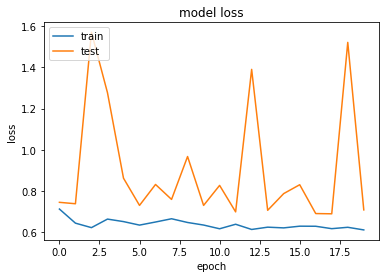

In [132]:
plot_loss(history)

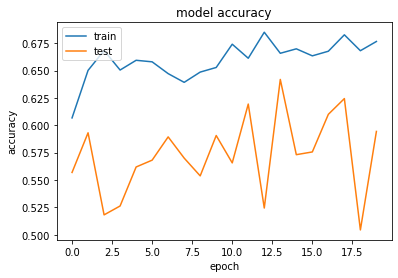

In [133]:
plot_accuracy(history)

In [22]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 1s 23ms/step - loss: 0.9254 - accuracy: 0.5745


[0.9254117608070374, 0.5745000243186951]